<a href="https://colab.research.google.com/github/SwaXTech/Simulacion-EaE/blob/main/Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico #6



In [ ]:
#@title Imports de bibliotecas necesarias
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import random
from tqdm.notebook import tqdm

In [ ]:
#@title Definición de funciones
def graph(dictionary, name, y_label= "Peticiones"):
  objects = dictionary.keys()
  y_pos = np.arange(len(objects))
  values = dictionary.values()

  plt.figure(figsize=(20, 5))
  plt.bar(y_pos, values, align='edge', width=0.3)
  plt.xticks(y_pos, objects)
  plt.ylabel(y_label)
  plt.title(name)

  plt.show()


def calculate_intervals(timestamps_list):
  intervals = []

  i = 1
  while i < len(timestamps_list):
    intervals.append((timestamps_list[i] - timestamps_list[i - 1]).astype('timedelta64[s]').astype(np.int32))
    i += 1

  return intervals


def print_data(dictionary):
  values = np.array(list(dictionary.values()))

  print("Media: %f" % values.mean())
  print("Varianza: %f" %values.var())
  print("Desvío Estandar: %f" %values.std())

def ocurr_by_hour(timestamps):
  dictionary = {}
  for date in timestamps:
    hour = date.hour

    if hour in dictionary.keys():
      dictionary[hour] +=1
    else:
      dictionary[hour] = 0

  return dictionary

def graph_result(result, name, y_label= "Porcentaje"):
  r = {intervalo:res[result] for (intervalo, res) in resultados.items()}
  graph(r, name,y_label= y_label)


In [ ]:
#@title Descarga del archivo de TimeStamps
!curl -L -o timestamps.csv -C - 'https://raw.githubusercontent.com/SwaXTech/Simulacion-EaE/main/timestamps.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  666k  100  666k    0     0  2207k      0 --:--:-- --:--:-- --:--:-- 2200k


In [ ]:
#@title Carga del archivo de timestamps
serie = pd.read_csv('timestamps.csv')
serie

,14/09/2021 0:00:07
0,14/09/2021 0:00:08
1,14/09/2021 0:00:08
2,14/09/2021 0:00:11
3,14/09/2021 0:00:21
4,14/09/2021 0:00:22
...,...
32821,14/09/2021 23:59:31
32822,14/09/2021 23:59:44
32823,14/09/2021 23:59:47
32824,14/09/2021 23:59:58


In [ ]:
#@title Conversión de strings a datetime
datetime_serie = serie.iloc[:,0].map(lambda timestamp: datetime.strptime(timestamp, '%d/%m/%Y %H:%M:%S'))

In [ ]:
#@title Separando por hora para conocer cómo se distribuyen las peticiones a lo largo de las horas
dictionary = ocurr_by_hour(datetime_serie)

print("Peticiones por Hora")
pd.Series(dictionary, name="Peticiones por Hora").to_frame()

Peticiones por Hora


,Peticiones por Hora
0,775
1,423
2,283
3,239
4,287
5,408
6,516
7,962
8,1242
9,1555


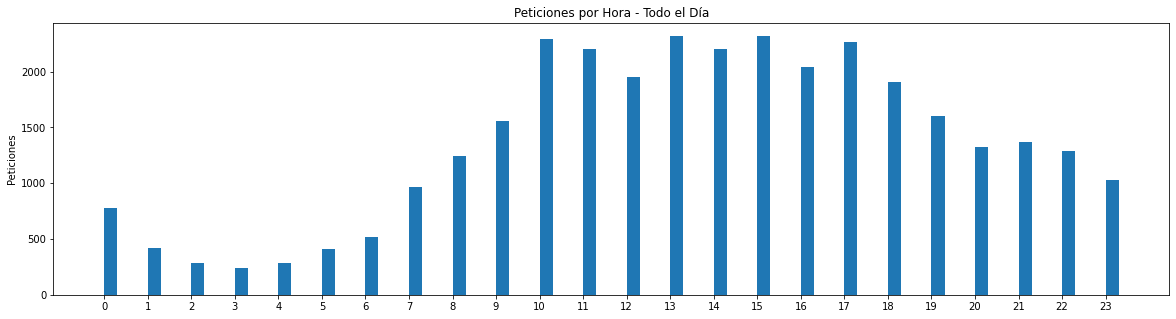

In [ ]:
#@title Generación del Histograma
#@markdown Separaremos la función de probabilidad en tres <br>
#@markdown - 0 a 9hs
#@markdown - 9 a 19hs
#@markdown - 19 a 00hs

graph(dictionary, "Peticiones por Hora - Todo el Día")

In [ ]:
#@title Media, Varianza y Desvío Estandar
print_data(dictionary)

Media: 1366.750000
Varianza: 536166.354167
Desvío Estandar: 732.233811


In [ ]:
#@title Reacomodamiento de timestamps

fr_0_9 =  [date for date in datetime_serie if date.hour < 9 ]
fr_9_19 = [date for date in datetime_serie if date.hour <= 19 and date.hour >= 9 ]
fr_19_0 = [date for date in datetime_serie if date.hour > 19 ]


dictionary_madrugada = ocurr_by_hour(fr_0_9)
dictionary_dia = ocurr_by_hour(fr_9_19)
dictionary_noche = ocurr_by_hour(fr_19_0)


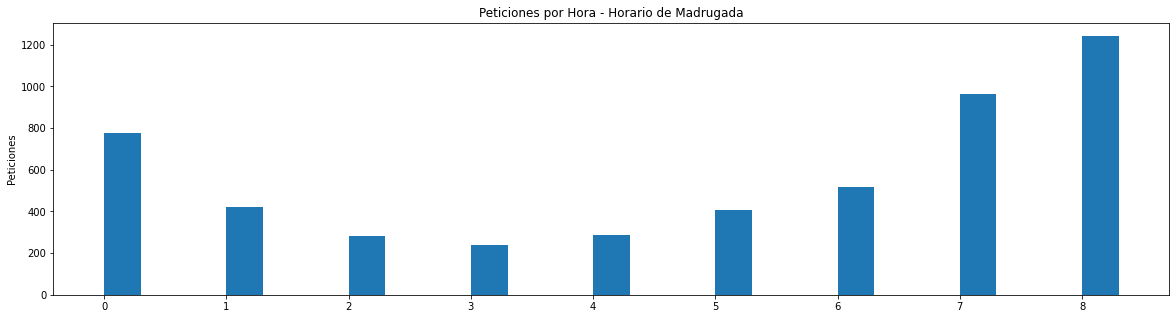

In [ ]:
#@title Histograma - Horario de Madrugada
graph(dictionary_madrugada, "Peticiones por Hora - Horario de Madrugada")

In [ ]:
#@title Media, Varianza y Desvío Estandar - Horario Madrugada
print_data(dictionary_madrugada)

Media: 570.555556
Varianza: 107784.246914
Desvío Estandar: 328.305113


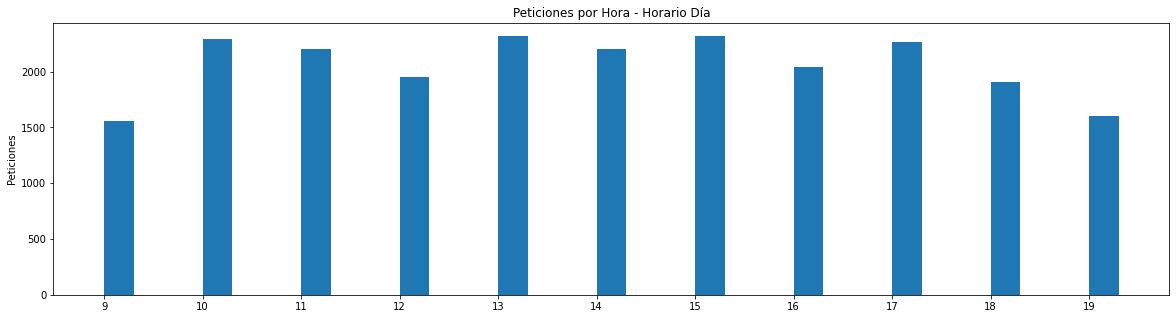

In [ ]:
#@title Histograma - Horario Día
graph(dictionary_dia, "Peticiones por Hora - Horario Día")

In [ ]:
#@title Media, Varianza y Desvío Estandar - Horario Pico
print_data(dictionary_dia)

Media: 2060.363636
Varianza: 70417.867769
Desvío Estandar: 265.363652


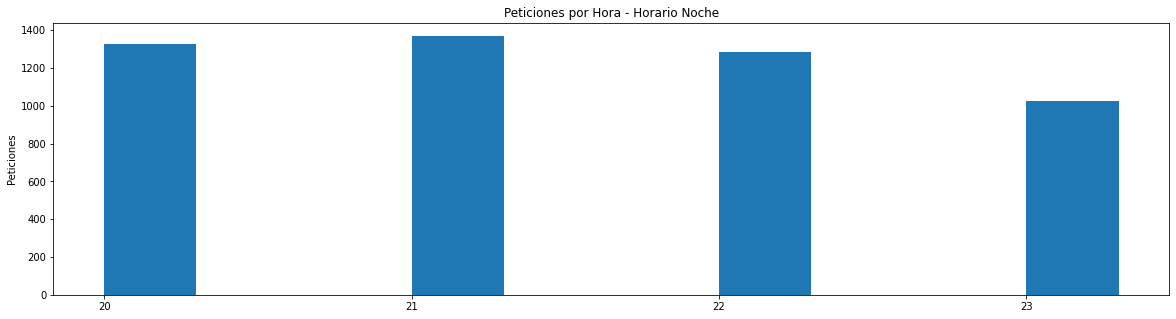

In [ ]:
#@title Histograma - Horario Noche
graph(dictionary_noche, "Peticiones por Hora - Horario Noche")

In [ ]:
#@title Media, Varianza y Desvío Estandar - Horario Noche
print_data(dictionary_noche)

Media: 1250.750000
Varianza: 18021.187500
Desvío Estandar: 134.243017


In [ ]:
#@title Descargar archivos .xlsx para Kairos (Solo funciona en chrome o basados en chromium)

flag = input("Desea descargar los archivos para Kairos? [Y/N]")
if flag == "Y":
  from google.colab import files

  pd.Series(fr_0_9).to_excel('horario_madrugada.xlsx', index = False, header = False)
  files.download('horario_madrugada.xlsx')

  pd.Series(fr_9_19).to_excel('horario_dia.xlsx', index = False, header = False)
  files.download('horario_dia.xlsx')

  pd.Series(fr_19_0).to_excel('horario_noche.xlsx', index = False, header = False)
  files.download('horario_noche.xlsx')

Desea descargar los archivos para Kairos? [Y/N]n


# Horario día

Función de Densidad de Probabilidad (Exponencial) :

$$f(x) = 0.5726e^{-0.5726x}$$

Función Inversa:

$$f(R) = \frac{ln(-R+1)}{-0.5726}$$

>Nota: Debe ignorarse R = 1 pues causará error en el logaritmo natural.




In [ ]:
def IA_dia():
  r = random.rand()
  while r == 1:
    r = random.rand()
  return int(np.log(-r+1) / -0.5726)


In [ ]:
#@title Generar 10 valores de IA durante el día
print("***Generando 10 IA durante el día***\n")
for _ in range(10):
  print("[*] IA: %d" % IA_dia())

***Generando 10 IA durante el día***

[*] IA: 0
[*] IA: 0
[*] IA: 3
[*] IA: 0
[*] IA: 0
[*] IA: 2
[*] IA: 1
[*] IA: 1
[*] IA: 0
[*] IA: 0


# Horario Noche

Función de Densidad de Probabilidad (Exponencial) :

$$f(x) = 0.3479e^{-0.3479x}$$

Función Inversa:

$$f(R) = \frac{ln(-R+1)}{-0.3479}$$

>Nota: Debe ignorarse R = 1 pues causará error en el logaritmo natural.

In [ ]:
def IA_noche():
  r = random.rand()
  while r == 1:
    r = random.rand()
  return int(np.log(-r+1) / -0.3479)

In [ ]:
#@title Generar 10 valores de IA durante la noche
print("***Generando 10 IA durante la noche***\n")
for _ in range(10):
  print("[*] IA: %d" % IA_noche())

***Generando 10 IA durante la noche***

[*] IA: 11
[*] IA: 1
[*] IA: 2
[*] IA: 0
[*] IA: 5
[*] IA: 1
[*] IA: 1
[*] IA: 5
[*] IA: 1
[*] IA: 9


# Horario Madrugada

Función de Densidad de Probabilidad (Exponencial) :

$$f(x) = 0.1588e^{-0.1588x}$$

Función Inversa:

$$f(R) = \frac{ln(-R+1)}{-0.1588}$$

>Nota: Debe ignorarse R = 1 pues causará error en el logaritmo natural.

In [ ]:
def IA_madrugada():
  r = random.rand()
  while r == 1:
    r = random.rand()
  return int(np.log(-r+1) / -0.1588)

In [ ]:
#@title Generar 10 valores de IA durante la madrugada
print("***Generando 10 IA durante la madrugada***\n")
for _ in range(10):
  print("[*] IA: %d" % IA_madrugada())

***Generando 10 IA durante la madrugada***

[*] IA: 0
[*] IA: 4
[*] IA: 12
[*] IA: 11
[*] IA: 7
[*] IA: 2
[*] IA: 4
[*] IA: 0
[*] IA: 1
[*] IA: 6


# Análisis

## Metodología Evento a Evento

## Clasificación de Variables


|  Variables Exógenas	  |                                                      |
|:---------------------:|:----------------------------------------------------:|
| Control               |IE - Intervalo de Ejecuciones                         |
| Dato                  |IA - Intervalo entre Arribos                          |

| Variables Endógenas   |             	                                       |
|:---------------------:|------------------------------------------------------|
| Estado                |NS - Cantidad de peticiones esperando a ser ejecutadas|
| Resultado             |PEC – Promedio de espera en la cola de ejecución.<br>PE10 – Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones.<br>PE0 – Porcentaje de ejecuciones que procesaron 0 peticiones.<br>PE40 – Porcentaje de ejecuciones que procesaron más de 40 peticiones.<br>PE25 – Porcentaje de ejecuciones que procesaron exactamente 25 peticiones.<br>PE20_30 – Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones<br>PPE – Promedio de peticiones procesadas en las ejecuciones<br>CED – Cantidad de ejecuciones diarias|



## Tabla de Eventos Independientes

| Evento    	| EFNC      	| EFC 	| Condición 	|
|-----------	|-----------	|-----	|-----------	|
| Llegada   	| Llegada   	| -   	| -         	|
| Ejecución 	| Ejecución 	| -   	| -         	|


## Tabla de Eventos Futuros

| TPLL | TPE |
|------|---- |

## Modelo


<details> 
  <summary>Ver modelo </summary>
   <img src="https://raw.githubusercontent.com/SwaXTech/Simulacion-EaE/main/TP6.jpg">
</details>





# Modelo de Simulación

In [ ]:
IE_MIN = 1  #@param
IE_MAX =  60#@param
TF = 10000000 #@param

In [ ]:
resultados = {}

In [ ]:
def simular(IE):

  T = 0
  TPLL = 0
  TPE = 0
  SPS = 0
  NS = 0
  NT = 0
  CE25 = 0
  CE40 = 0
  CE0 = 0
  CE10 = 0
  CE20_30 = 0
  ET = 0

  pbar = tqdm(total=TF)
  while T < TF:
    if TPLL < TPE:

      SPS += (TPLL - T) * NS
      pbar.update(TPLL - T)
      
      T = TPLL

      h = (T/3600) % 24

      if h < 9:
        IA = IA_madrugada()
        TPLL = T + IA
      elif h > 19:
        IA = IA_noche()
        TPLL = T + IA
      else:
        IA = IA_dia()
        TPLL = T + IA

      NS += 1

      NT += 1
    else:

      SPS += (TPE - T) * NS
      pbar.update(TPE - T)

      T = TPE

      TPE = T + IE

      ET += 1

      if NS < 10:
        if NS == 0:
          CE0 += 1
        else:
          CE10 += 1
      elif NS > 20:
        if NS < 30:
          if NS == 25:
            CE25 +=1
          CE20_30 += 1
        elif NS > 40:
          CE40 += 1
      
      NS = 0
    
        

  PEC = SPS / NT
  PE0 = (CE0 * 100) / ET
  PE10 = (CE10 * 100) / ET
  PE25 = (CE25 * 100) / ET
  PE20_30 = (CE20_30 * 100) / ET
  PE40 = (CE40 * 100) / ET
  PPE = NT / ET
  CED = ET / (T / 86400)

  print("*"*100)
  print("Resultados para la simulación con IE = {} segundos".format(round(IE, 2)))
  print("Promedio de Espera en Cola: {} segundos".format(round(PEC, 2)))
  print("Porcentaje de ejecuciones que procesaron 0 peticiones: {} %".format(round(PE0, 2)))
  print("Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: {} %".format(round(PE10, 2)))
  print("Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: {} %".format(round(PE25, 2)))
  print("Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: {} %".format(round(PE20_30, 2)))
  print("Porcentaje de ejecuciones que procesaron más de 40 peticiones: {} %".format(round(PE40, 2)))
  print("Promedio de peticiones procesadas por cada ejecución: {}".format(round(PPE, 2)))
  print("Cantidad de ejecuciones diarias: {}".format(round(CED)))
  print("*"*100)
  print()

  resultados[IE] = {
      "PEC": PEC,
      "PE0": PE0,
      "PE10": PE10,
      "PE25": PE25,
      "PE20_30": PE20_30,
      "PE40": PE40,
      "PPE": PPE,
      "CED": CED,
  }

In [ ]:
#@title Hacer la simulación
IE = IE_MIN
while IE <= IE_MAX:
  simular(IE)
  IE += 1
  #pbar.update(1)

  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 1 segundos
Promedio de Espera en Cola: 1.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 70.24 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 29.75 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 0.47
Cantidad de ejecuciones diarias: 86400
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 2 segundos
Promedio de Espera en Cola: 1.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 50.92 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 49.01 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 0.95
Cantidad de ejecuciones diarias: 43200
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 3 segundos
Promedio de Espera en Cola: 2.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 38.11 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 61.64 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 1.42
Cantidad de ejecuciones diarias: 28800
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 4 segundos
Promedio de Espera en Cola: 2.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 29.25 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 70.1 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 1.89
Cantidad de ejecuciones diarias: 21600
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 5 segundos
Promedio de Espera en Cola: 3.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 23.03 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 75.53 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 2.37
Cantidad de ejecuciones diarias: 17280
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 6 segundos
Promedio de Espera en Cola: 3.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 18.38 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 78.98 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 2.84
Cantidad de ejecuciones diarias: 14400
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 7 segundos
Promedio de Espera en Cola: 4.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 14.96 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 80.66 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 3.31
Cantidad de ejecuciones diarias: 12343
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 8 segundos
Promedio de Espera en Cola: 4.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 12.28 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 81.08 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.03 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 3.78
Cantidad de ejecuciones diarias: 10800
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 9 segundos
Promedio de Espera en Cola: 5.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 10.14 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 80.48 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.07 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 4.26
Cantidad de ejecuciones diarias: 9600
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 10 segundos
Promedio de Espera en Cola: 5.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 8.42 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 79.08 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.13 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 4.73
Cantidad de ejecuciones diarias: 8640
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 11 segundos
Promedio de Espera en Cola: 6.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 7.09 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 77.01 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.23 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 5.21
Cantidad de ejecuciones diarias: 7855
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 12 segundos
Promedio de Espera en Cola: 6.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 5.92 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 74.62 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.02 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.41 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 5.68
Cantidad de ejecuciones diarias: 7200
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 13 segundos
Promedio de Espera en Cola: 7.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 5.02 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 71.95 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.04 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.69 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 6.15
Cantidad de ejecuciones diarias: 6646
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 14 segundos
Promedio de Espera en Cola: 7.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 4.23 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 69.17 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.07 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 1.05 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 6.63
Cantidad de ejecuciones diarias: 6171
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 15 segundos
Promedio de Espera en Cola: 7.99 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 3.61 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 66.35 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.12 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 1.52 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 7.09
Cantidad de ejecuciones diarias: 5760
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 16 segundos
Promedio de Espera en Cola: 8.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 3.06 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 63.65 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.17 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 2.22 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 7.57
Cantidad de ejecuciones diarias: 5400
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 17 segundos
Promedio de Espera en Cola: 9.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 2.57 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 61.25 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.25 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 2.97 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 8.04
Cantidad de ejecuciones diarias: 5082
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 18 segundos
Promedio de Espera en Cola: 9.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 2.18 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 58.7 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.35 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 4.01 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 8.52
Cantidad de ejecuciones diarias: 4800
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 19 segundos
Promedio de Espera en Cola: 10.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 1.85 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 56.49 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.47 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 5.15 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 9.0
Cantidad de ejecuciones diarias: 4547
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 20 segundos
Promedio de Espera en Cola: 10.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 1.63 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 54.4 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.6 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 6.46 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 9.46
Cantidad de ejecuciones diarias: 4320
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 21 segundos
Promedio de Espera en Cola: 11.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 1.34 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 52.54 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.78 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 7.95 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.01 %
Promedio de peticiones procesadas por cada ejecución: 9.93
Cantidad de ejecuciones diarias: 4114
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 22 segundos
Promedio de Espera en Cola: 11.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 1.15 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 50.78 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.97 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 9.6 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.01 %
Promedio de peticiones procesadas por cada ejecución: 10.42
Cantidad de ejecuciones diarias: 3927
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 23 segundos
Promedio de Espera en Cola: 12.01 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.97 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 49.28 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.17 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 11.16 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.02 %
Promedio de peticiones procesadas por cada ejecución: 10.88
Cantidad de ejecuciones diarias: 3757
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 24 segundos
Promedio de Espera en Cola: 12.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.84 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 47.78 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.36 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 12.82 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.04 %
Promedio de peticiones procesadas por cada ejecución: 11.36
Cantidad de ejecuciones diarias: 3600
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 25 segundos
Promedio de Espera en Cola: 13.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.73 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 46.45 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.51 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 14.46 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.05 %
Promedio de peticiones procesadas por cada ejecución: 11.83
Cantidad de ejecuciones diarias: 3456
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 26 segundos
Promedio de Espera en Cola: 13.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.6 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 45.14 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.75 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 16.01 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.07 %
Promedio de peticiones procesadas por cada ejecución: 12.31
Cantidad de ejecuciones diarias: 3323
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 27 segundos
Promedio de Espera en Cola: 14.01 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.54 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 43.96 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.97 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 17.5 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.12 %
Promedio de peticiones procesadas por cada ejecución: 12.77
Cantidad de ejecuciones diarias: 3200
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 28 segundos
Promedio de Espera en Cola: 14.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.43 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 42.87 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.14 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 18.82 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.17 %
Promedio de peticiones procesadas por cada ejecución: 13.25
Cantidad de ejecuciones diarias: 3086
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 29 segundos
Promedio de Espera en Cola: 15.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.36 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 41.77 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.28 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 19.9 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.24 %
Promedio de peticiones procesadas por cada ejecución: 13.72
Cantidad de ejecuciones diarias: 2979
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 30 segundos
Promedio de Espera en Cola: 15.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.32 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 40.71 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.4 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 20.85 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.34 %
Promedio de peticiones procesadas por cada ejecución: 14.2
Cantidad de ejecuciones diarias: 2880
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 31 segundos
Promedio de Espera en Cola: 15.99 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.28 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 39.85 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.49 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 21.55 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.46 %
Promedio de peticiones procesadas por cada ejecución: 14.67
Cantidad de ejecuciones diarias: 2787
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 32 segundos
Promedio de Espera en Cola: 16.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.22 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 38.9 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.61 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 22.17 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.63 %
Promedio de peticiones procesadas por cada ejecución: 15.16
Cantidad de ejecuciones diarias: 2700
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 33 segundos
Promedio de Espera en Cola: 17.01 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.2 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 38.0 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.58 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 22.25 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.86 %
Promedio de peticiones procesadas por cada ejecución: 15.61
Cantidad de ejecuciones diarias: 2618
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 34 segundos
Promedio de Espera en Cola: 17.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.16 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 37.08 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.6 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 22.54 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 1.15 %
Promedio de peticiones procesadas por cada ejecución: 16.08
Cantidad de ejecuciones diarias: 2541
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 35 segundos
Promedio de Espera en Cola: 18.01 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.15 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 36.27 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.57 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 22.39 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 1.47 %
Promedio de peticiones procesadas por cada ejecución: 16.56
Cantidad de ejecuciones diarias: 2469
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 36 segundos
Promedio de Espera en Cola: 18.51 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.12 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 35.45 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.57 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 22.08 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 1.87 %
Promedio de peticiones procesadas por cada ejecución: 17.04
Cantidad de ejecuciones diarias: 2400
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 37 segundos
Promedio de Espera en Cola: 19.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.12 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 34.61 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.48 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 21.69 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 2.31 %
Promedio de peticiones procesadas por cada ejecución: 17.5
Cantidad de ejecuciones diarias: 2335
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 38 segundos
Promedio de Espera en Cola: 19.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.09 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 33.76 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.43 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 21.08 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 2.94 %
Promedio de peticiones procesadas por cada ejecución: 17.97
Cantidad de ejecuciones diarias: 2274
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 39 segundos
Promedio de Espera en Cola: 20.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.08 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 32.97 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.32 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 20.48 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 3.49 %
Promedio de peticiones procesadas por cada ejecución: 18.45
Cantidad de ejecuciones diarias: 2215
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 40 segundos
Promedio de Espera en Cola: 20.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.06 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 32.23 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.2 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 19.75 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 4.4 %
Promedio de peticiones procesadas por cada ejecución: 18.94
Cantidad de ejecuciones diarias: 2160
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 41 segundos
Promedio de Espera en Cola: 20.99 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.05 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 31.3 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 2.13 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 19.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 5.23 %
Promedio de peticiones procesadas por cada ejecución: 19.43
Cantidad de ejecuciones diarias: 2107
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 42 segundos
Promedio de Espera en Cola: 21.49 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.05 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 30.58 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.98 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 18.29 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 6.05 %
Promedio de peticiones procesadas por cada ejecución: 19.88
Cantidad de ejecuciones diarias: 2057
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 43 segundos
Promedio de Espera en Cola: 21.99 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.04 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 29.76 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.92 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 17.64 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 7.03 %
Promedio de peticiones procesadas por cada ejecución: 20.35
Cantidad de ejecuciones diarias: 2009
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 44 segundos
Promedio de Espera en Cola: 22.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.03 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 29.02 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.84 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 17.05 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 8.14 %
Promedio de peticiones procesadas por cada ejecución: 20.83
Cantidad de ejecuciones diarias: 1964
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 45 segundos
Promedio de Espera en Cola: 23.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.03 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 28.15 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.8 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 16.51 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 9.34 %
Promedio de peticiones procesadas por cada ejecución: 21.3
Cantidad de ejecuciones diarias: 1920
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 46 segundos
Promedio de Espera en Cola: 23.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.02 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 27.33 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.73 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 15.91 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 10.77 %
Promedio de peticiones procesadas por cada ejecución: 21.78
Cantidad de ejecuciones diarias: 1878
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 47 segundos
Promedio de Espera en Cola: 24.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.03 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 26.53 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.64 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 15.38 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 11.96 %
Promedio de peticiones procesadas por cada ejecución: 22.23
Cantidad de ejecuciones diarias: 1838
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 48 segundos
Promedio de Espera en Cola: 24.49 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.02 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 25.77 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.56 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 14.99 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 13.42 %
Promedio de peticiones procesadas por cada ejecución: 22.72
Cantidad de ejecuciones diarias: 1800
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 49 segundos
Promedio de Espera en Cola: 24.98 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.02 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 24.91 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.56 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 14.65 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 14.72 %
Promedio de peticiones procesadas por cada ejecución: 23.17
Cantidad de ejecuciones diarias: 1763
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 50 segundos
Promedio de Espera en Cola: 25.48 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.02 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 24.13 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.55 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 14.22 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 16.46 %
Promedio de peticiones procesadas por cada ejecución: 23.68
Cantidad de ejecuciones diarias: 1728
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 51 segundos
Promedio de Espera en Cola: 26.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 23.34 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.5 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 13.9 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 18.06 %
Promedio de peticiones procesadas por cada ejecución: 24.15
Cantidad de ejecuciones diarias: 1694
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 52 segundos
Promedio de Espera en Cola: 26.51 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 22.48 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.49 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 13.72 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 19.56 %
Promedio de peticiones procesadas por cada ejecución: 24.63
Cantidad de ejecuciones diarias: 1662
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 53 segundos
Promedio de Espera en Cola: 27.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 21.64 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.49 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 13.43 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 21.09 %
Promedio de peticiones procesadas por cada ejecución: 25.11
Cantidad de ejecuciones diarias: 1630
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 54 segundos
Promedio de Espera en Cola: 27.51 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 20.84 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.5 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 13.25 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 22.57 %
Promedio de peticiones procesadas por cada ejecución: 25.58
Cantidad de ejecuciones diarias: 1600
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 55 segundos
Promedio de Espera en Cola: 27.99 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 20.01 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.52 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 13.18 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 24.02 %
Promedio de peticiones procesadas por cada ejecución: 26.03
Cantidad de ejecuciones diarias: 1571
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 56 segundos
Promedio de Espera en Cola: 28.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 19.17 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.51 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 12.98 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 25.34 %
Promedio de peticiones procesadas por cada ejecución: 26.49
Cantidad de ejecuciones diarias: 1543
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 57 segundos
Promedio de Espera en Cola: 28.99 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 18.44 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.48 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 13.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 26.98 %
Promedio de peticiones procesadas por cada ejecución: 26.97
Cantidad de ejecuciones diarias: 1516
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 58 segundos
Promedio de Espera en Cola: 29.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 17.54 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.52 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 12.83 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 28.31 %
Promedio de peticiones procesadas por cada ejecución: 27.48
Cantidad de ejecuciones diarias: 1490
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 59 segundos
Promedio de Espera en Cola: 30.0 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.01 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 16.79 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.46 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 12.66 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 29.42 %
Promedio de peticiones procesadas por cada ejecución: 27.92
Cantidad de ejecuciones diarias: 1464
****************************************************************************************************



  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 60 segundos
Promedio de Espera en Cola: 30.52 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 16.15 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 1.42 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 12.44 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 30.72 %
Promedio de peticiones procesadas por cada ejecución: 28.39
Cantidad de ejecuciones diarias: 1440
****************************************************************************************************



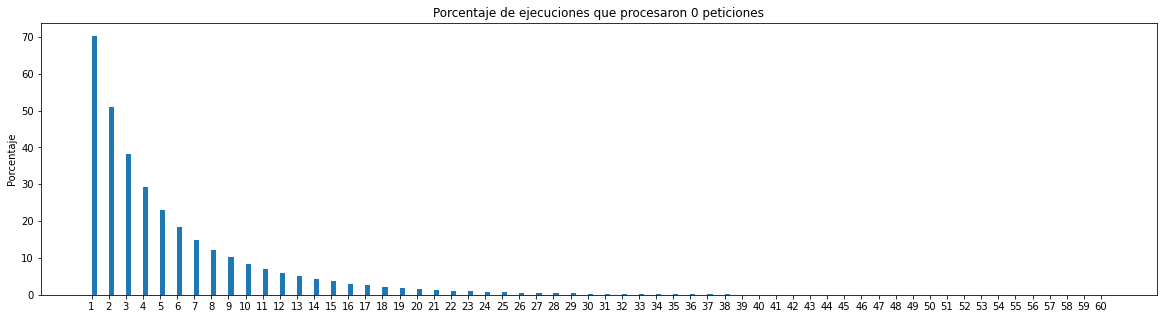

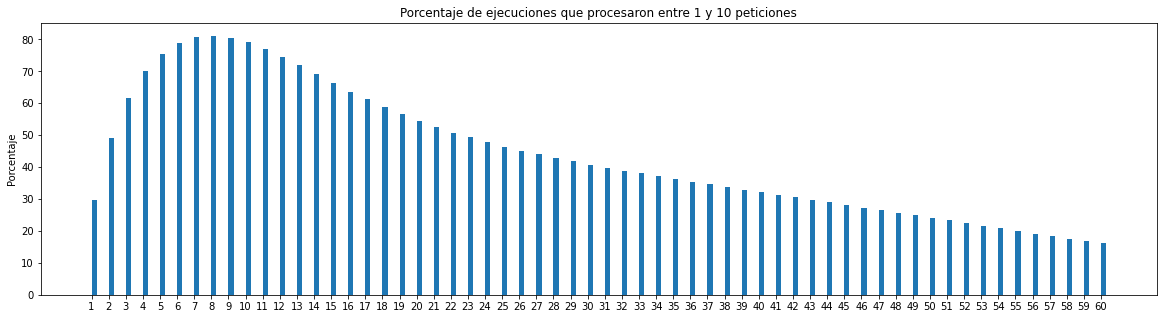

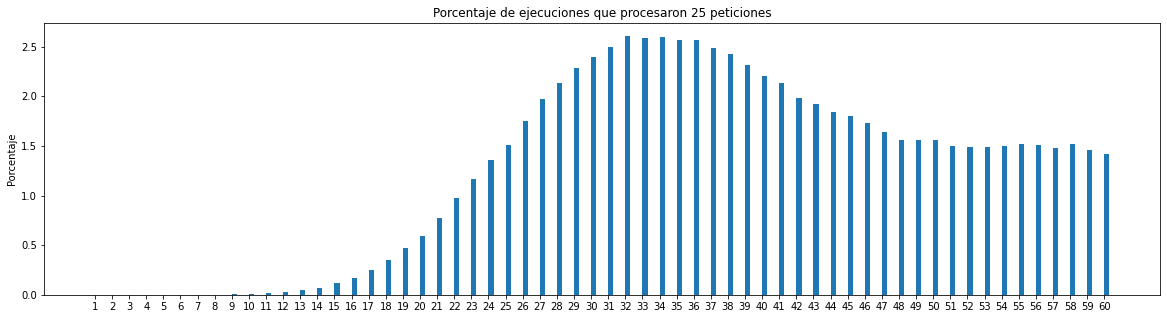

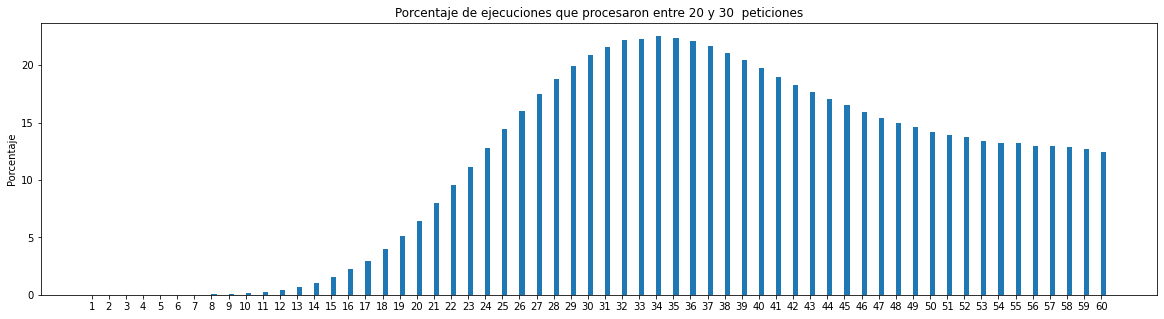

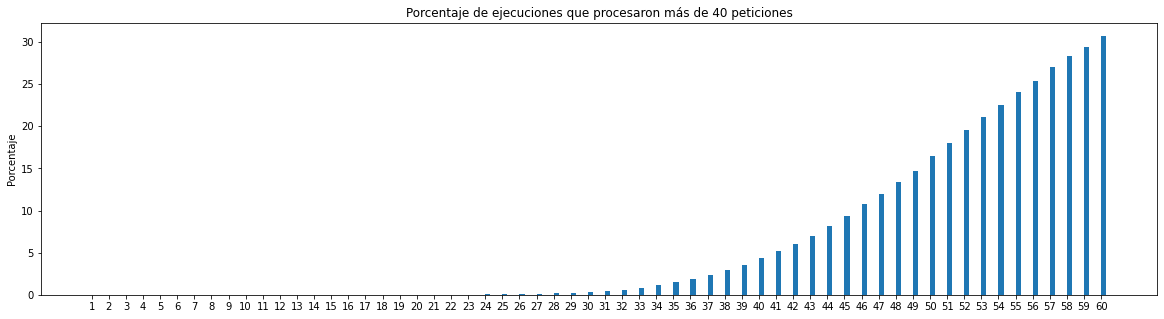

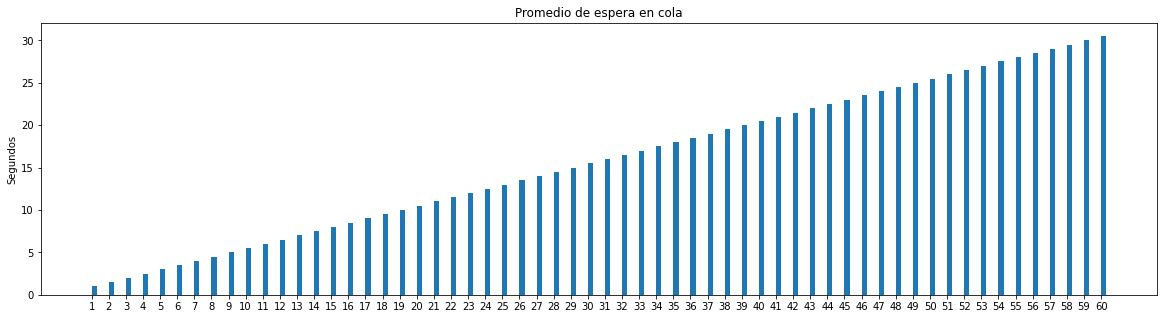

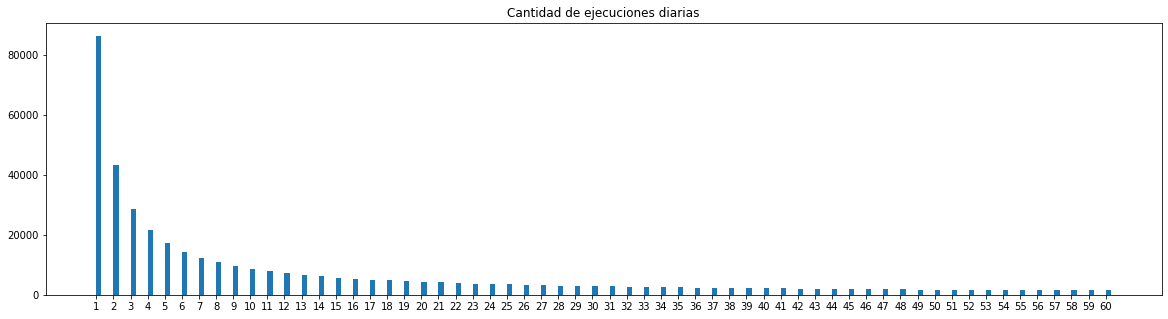

In [ ]:
graph_result("PE0", "Porcentaje de ejecuciones que procesaron 0 peticiones")
graph_result("PE10", "Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones")
graph_result("PE25", "Porcentaje de ejecuciones que procesaron 25 peticiones")
graph_result("PE20_30", "Porcentaje de ejecuciones que procesaron entre 20 y 30  peticiones")
graph_result("PE40", "Porcentaje de ejecuciones que procesaron más de 40 peticiones")
graph_result("PEC", "Promedio de espera en cola", "Segundos")
graph_result("CED", "Cantidad de ejecuciones diarias", "")

In [ ]:
#@title Escenario actual: 5 minutos
simular(60 * 5)

  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 300 segundos
Promedio de Espera en Cola: 150.44 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.04 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 97.44 %
Promedio de peticiones procesadas por cada ejecución: 141.95
Cantidad de ejecuciones diarias: 288
****************************************************************************************************



In [ ]:
#@title Resultados por Franja Horaria
#@markdown <details> <summary>Ver modelo </summary><img src="https://raw.githubusercontent.com/SwaXTech/Simulacion-EaE/main/TP6.jpg"></details>
resultados = {}
def simular(IE):

  T = 0
  TPLL = 0
  TPE = 0
  SPS = 0
  NS = 0
  NT = 0
  CE25 = 0
  CE40 = 0
  CE0 = 0
  CE10 = 0
  CE20_30 = 0
  ET = 0

  pbar = tqdm(total=TF)
  while T < TF:
    if TPLL < TPE:

      SPS += (TPLL - T) * NS
      pbar.update(TPLL - T)
      
      T = TPLL

      IA = IA_madrugada()
      TPLL = T + IA
#      elif h > 19:
#      IA = IA_noche()
#      TPLL = T + IA
#      else:
#      IA = IA_dia()
#      TPLL = T + IA

      NS += 1

      NT += 1
    else:

      SPS += (TPE - T) * NS
      pbar.update(TPE - T)

      T = TPE

      TPE = T + IE

      ET += 1

      if NS < 10:
        if NS == 0:
          CE0 += 1
        else:
          CE10 += 1
      elif NS > 20:
        if NS < 30:
          if NS == 25:
            CE25 +=1
          CE20_30 += 1
        elif NS > 40:
          CE40 += 1
      
      NS = 0
    
        

  PEC = SPS / NT
  PE0 = (CE0 * 100) / ET
  PE10 = (CE10 * 100) / ET
  PE25 = (CE25 * 100) / ET
  PE20_30 = (CE20_30 * 100) / ET
  PE40 = (CE40 * 100) / ET
  PPE = NT / ET
  CED = ET / (T / 86400)

  print("*"*100)
  print("Resultados para la simulación con IE = {} segundos".format(round(IE, 2)))
  print("Promedio de Espera en Cola: {} segundos".format(round(PEC, 2)))
  print("Porcentaje de ejecuciones que procesaron 0 peticiones: {} %".format(round(PE0, 2)))
  print("Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: {} %".format(round(PE10, 2)))
  print("Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: {} %".format(round(PE25, 2)))
  print("Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: {} %".format(round(PE20_30, 2)))
  print("Porcentaje de ejecuciones que procesaron más de 40 peticiones: {} %".format(round(PE40, 2)))
  print("Promedio de peticiones procesadas por cada ejecución: {}".format(round(PPE, 2)))
  print("Cantidad de ejecuciones diarias: {}".format(round(CED)))
  print("*"*100)
  print()

  resultados[IE] = {
      "PEC": PEC,
      "PE0": PE0,
      "PE10": PE10,
      "PE25": PE25,
      "PE20_30": PE20_30,
      "PE40": PE40,
      "PPE": PPE,
      "CED": CED,
  }

In [ ]:
#@title 34 segundos a la madrugada
simular(34)

  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 34 segundos
Promedio de Espera en Cola: 17.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.41 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 90.58 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 5.85
Cantidad de ejecuciones diarias: 2541
****************************************************************************************************



In [ ]:
#@title 34 segundos durante el día
simular(34)

  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 34 segundos
Promedio de Espera en Cola: 17.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 0.15 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 5.97 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 49.64 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 2.76 %
Promedio de peticiones procesadas por cada ejecución: 26.28
Cantidad de ejecuciones diarias: 2541
****************************************************************************************************



In [ ]:
#@title 34 segundos durante la noche
simular(34)

  0%|          | 0/10000000 [00:00<?, ?it/s]

****************************************************************************************************
Resultados para la simulación con IE = 34 segundos
Promedio de Espera en Cola: 17.5 segundos
Porcentaje de ejecuciones que procesaron 0 peticiones: 0.0 %
Porcentaje de ejecuciones que procesaron entre 1 y 10 peticiones: 14.8 %
Porcentaje de ejecuciones que procesaron exactamente 25 peticiones: 0.66 %
Porcentaje de ejecuciones que procesaron entre 20 y 30 peticiones: 8.38 %
Porcentaje de ejecuciones que procesaron más de 40 peticiones: 0.0 %
Promedio de peticiones procesadas por cada ejecución: 14.14
Cantidad de ejecuciones diarias: 2541
****************************************************************************************************

